## Vanishing/Exploding Gradients

In [1]:
from tensorflow import keras

In [2]:
keras.layers.Dense(10, activation="relu", 
                    kernel_initializer="he_normal")

In [4]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, 
                                                mode="fan_avg", 
                                                distribution="uniform")
keras.layers.Dense(10, activation="relu", 
                    kernel_initializer=he_avg_init)

In [5]:
# using leaky relu
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
keras.layers.Dense(10, activation=leaky_relu, 
                    kernel_initializer="he_normal")

In [6]:
keras.layers.Dense(10, activation="selu", 
                    kernel_initializer="lecun_normal")

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, activation="elu", 
                        kernel_initializer="he_normal"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation="elu", 
                        kernel_initializer="he_normal"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [10]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [11]:
model.layers[1].updates

C:\Users\SG704\AppData\Local\Temp/ipykernel_12816/3873162892.py:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  model.layers[1].updates


[]

In [2]:
from tensorflow import keras

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, 
        kernel_initializer="he_normal", 
        use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation("elu"), 
    keras.layers.Dense(100, 
        kernel_initializer="he_normal", 
        use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation("elu"), 
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

## Reusing Pretrained Layers

In [1]:
from tensorflow import keras
import numpy as np

def get_data_without_5_6(data, labels):
    new_data, new_labels = [], []
    for i, label in enumerate(labels):
        if (label != 5) & (label != 6):
            if label > 5:
                new_labels.append(labels[i]-2)
            else:
                new_labels.append(labels[i])
            new_data.append(data[i])
    return np.array(new_data), np.array(new_labels)
        
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_A, y_train_A = get_data_without_5_6(X_train, y_train)
X_test_A, y_test_A = get_data_without_5_6(X_test, y_test)
X_train_A, X_val_A = X_train_A[:30000], X_train_A[30000:]
y_train_A, y_val_A = y_train_A[:30000], y_train_A[30000:]

In [2]:


model_A = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(8, activation="softmax")
])
model_A.compile(loss="sparse_categorical_crossentropy", 
                optimizer="sgd", 
                metrics="accuracy")
model_A.fit(X_train_A, y_train_A, epochs=100, 
            validation_data=(X_val_A, y_val_A), 
            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                     patience=10, 
                                                     restore_best_weights=True)])

Epoch 1/100
938/938 [==============================] - 7s 5ms/step - loss: 0.3977 - accuracy: 0.8659 - val_loss: 0.2692 - val_accuracy: 0.9088
Epoch 2/100
938/938 [==============================] - 5s 5ms/step - loss: 0.2771 - accuracy: 0.9043 - val_loss: 0.2425 - val_accuracy: 0.9173
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2402 - accuracy: 0.9177 - val_loss: 0.2338 - val_accuracy: 0.9207
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2150 - accuracy: 0.9246 - val_loss: 0.2207 - val_accuracy: 0.9251
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2044 - accuracy: 0.9281 - val_loss: 0.2209 - val_accuracy: 0.9233
Epoch 6/100
938/938 [==============================] - 3s 4ms/step - loss: 0.1892 - accuracy: 0.9326 - val_loss: 0.2141 - val_accuracy: 0.9277
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.1761 - accuracy: 0.9371 - val_loss: 0.2168 - val_accuracy: 0.9251

In [3]:
model_A.evaluate(X_test_A, y_test_A)

250/250 [==============================] - 1s 2ms/step - loss: 0.2272 - accuracy: 0.9243


[0.22721777856349945, 0.9242500066757202]

In [4]:
def get_data_withonly_5_6(data, labels):
    new_data, new_labels = [], []
    for i, label in enumerate(labels):
        if label == 5:
            new_data.append(data[i])
            new_labels.append(1)
        elif label == 6:
            new_data.append(data[i])
            new_labels.append(0)
    return np.array(new_data), np.array(new_labels)

X_train_B, y_train_B = get_data_withonly_5_6(X_train, y_train)
X_test_B, y_test_B = get_data_withonly_5_6(X_test, y_test)
X_train_B, X_val_B = X_train_B[:10000], X_train_B[10000:]
y_train_B, y_val_B = y_train_B[:10000], y_train_B[10000:]

In [5]:
model_B = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(10, activation="relu"), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(1, activation="sigmoid")
])
model_B.compile(loss="binary_crossentropy", 
                optimizer="sgd", 
                metrics="accuracy")
model_B.fit(X_train_B, y_train_B, epochs=100, 
            validation_data=(X_val_B, y_val_B), 
            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                     patience=10, 
                                                     restore_best_weights=True)])

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.1196 - accuracy: 0.9791 - val_loss: 0.0525 - val_accuracy: 0.9920
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9923 - val_loss: 0.0312 - val_accuracy: 0.9925
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.0296 - accuracy: 0.9956 - val_loss: 0.0316 - val_accuracy: 0.9930
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9970 - val_loss: 0.0238 - val_accuracy: 0.9950
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9965 - val_loss: 0.0205 - val_accuracy: 0.9950
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9980 - val_loss: 0.0240 - val_accuracy: 0.9950
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9979 - val_loss: 0.0163 - val_accuracy: 0.9955

In [6]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9985


[0.0075619034469127655, 0.9984999895095825]

In [7]:
model_A.evaluate(X_test_A, y_test_A)

250/250 [==============================] - 1s 2ms/step - loss: 0.2272 - accuracy: 0.9243


[0.22721777856349945, 0.9242500066757202]

In [8]:
model_B_on_A = keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [9]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [10]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", 
                     optimizer="sgd", 
                     metrics=["accuracy"])


In [11]:
history_b_on_A = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, 
                                  validation_data=(X_val_B, y_val_B))

Epoch 1/4
313/313 [==============================] - 1s 3ms/step - loss: 0.1328 - accuracy: 0.9611 - val_loss: 0.0554 - val_accuracy: 0.9880
Epoch 2/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9950 - val_loss: 0.0379 - val_accuracy: 0.9905
Epoch 3/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0238 - accuracy: 0.9962 - val_loss: 0.0313 - val_accuracy: 0.9910
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9967 - val_loss: 0.0280 - val_accuracy: 0.9910


In [12]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=1e-4)
model_B_on_A.compile(loss="binary_crossentropy", 
                     optimizer=optimizer, 
                     metrics=["accuracy"])

history_b_on_A = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, 
                                  validation_data=(X_val_B, y_val_B))

Epoch 1/16
313/313 [==============================] - 2s 4ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.0410 - val_accuracy: 0.9905
Epoch 2/16
313/313 [==============================] - 1s 4ms/step - loss: 0.0333 - accuracy: 0.9916 - val_loss: 0.0398 - val_accuracy: 0.9915
Epoch 3/16
313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9919 - val_loss: 0.0361 - val_accuracy: 0.9915
Epoch 4/16
313/313 [==============================] - 2s 5ms/step - loss: 0.0327 - accuracy: 0.9916 - val_loss: 0.0353 - val_accuracy: 0.9910
Epoch 5/16
313/313 [==============================] - 2s 7ms/step - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.0327 - val_accuracy: 0.9910
Epoch 6/16
313/313 [==============================] - 2s 6ms/step - loss: 0.0312 - accuracy: 0.9919 - val_loss: 0.0321 - val_accuracy: 0.9915
Epoch 7/16
313/313 [==============================] - 2s 7ms/step - loss: 0.0268 - accuracy: 0.9946 - val_loss: 0.0312 - val_accuracy: 0.9915
Epoch 

In [13]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9975


[0.015052733942866325, 0.9975000023841858]

## Faster Optimizer

In [4]:
from tensorflow import keras
momentum_optimizer = keras.optimizers.SGD(learning_rate=0.001, 
                                          momentum=0.9)

In [2]:
from tensorflow import keras
nag_optimizer = keras.optimizers.SGD(learning_rate=1e-3, 
                                     momentum=0.9, 
                                     nesterov=True)

In [3]:
adagrad_optimizer = keras.optimizers.Adagrad(learning_rate=1e-3, 
                                             initial_accumulator_value=0.1, 
                                             epsilon=1e-10)

In [4]:
rmsprop_optimizer = keras.optimizers.RMSprop(learning_rate=1e-3, 
                                             rho=0.9)

In [5]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, 
                                       beta_1=0.9, 
                                       beta_2=0.999)

In [1]:
from tensorflow import keras
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [2]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [3]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [4]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, 
                                                 patience=5)

In [5]:
length_of_dataset = 2000
s = 20 * length_of_dataset // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

## Avoiding Overfitting Through Regularization

In [1]:
from tensorflow import keras

l1_dense_layer = keras.layers.Dense(
    units=100, 
    activation="elu", 
    kernel_initializer="he_normal", 
    kernel_regularizer=keras.regularizers.l1(0.01)
)

In [2]:
l2_dense_layer = keras.layers.Dense(
    units=100, 
    activation="elu", 
    kernel_initializer="he_normal", 
    kernel_regularizer=keras.regularizers.l2(0.01)
)

In [4]:
l1_l2_dense_layer = keras.layers.Dense(
    units=100, 
    activation="elu", 
    kernel_initializer="he_normal", 
    kernel_regularizer=keras.regularizers.l1_l2(0.01)
)

In [5]:
from functools import partial

RegularizedDense = partial(
    keras.layers.Dense, 
    activation="elu", 
    kernel_initializer="he_normal", 
    kernel_regularizer=keras.regularizers.l2(0.01)
)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    RegularizedDense(300), 
    RegularizedDense(100), 
    RegularizedDense(10, activation="softmax", 
                     kernel_initializer="glorot_uniform")
])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(300, activation="elu", 
                       kernel_initializer="he_normal"), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(100, activation="elu", 
                       kernel_initializer="he_normal"), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_val = X_train[:50000], X_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]


model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(300, activation="relu", 
                        kernel_initializer="he_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(100, activation="relu", 
                        kernel_initializer="he_normal"), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(10, activation="softmax")
]) 
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, 
                                                 patience=5)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, 
          validation_data=(X_val, y_val), 
          callbacks=[keras.callbacks.EarlyStopping(patience=10, 
                                                   restore_best_weights=True)])


Epoch 1/100
1563/1563 [==============================] - 7s 3ms/step - loss: 0.7499 - accuracy: 0.7347 - val_loss: 0.4495 - val_accuracy: 0.8339
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5557 - accuracy: 0.8009 - val_loss: 0.4183 - val_accuracy: 0.8449
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.8169 - val_loss: 0.3996 - val_accuracy: 0.8519
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4814 - accuracy: 0.8258 - val_loss: 0.3785 - val_accuracy: 0.8615
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4537 - accuracy: 0.8347 - val_loss: 0.3762 - val_accuracy: 0.8636
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4426 - accuracy: 0.8378 - val_loss: 0.3611 - val_accuracy: 0.8694
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4325 - accuracy: 0.8420 - val_loss: 0.3584 - val_ac

In [19]:
model.save("fashion_mnist.h5")

In [11]:
import numpy as np

with keras.backend.learning_phase_scope(1):
    y_probas = np.stack([model.predict(X_test) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

C:\Users\msi1\AppData\Local\Programs\Python\Python38\lib\contextlib.py:113: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  return next(self.gen)


In [39]:
np.round(model.predict(X_test[:1]), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.998]], dtype=float32)

In [44]:
np.round(y_probas[:, :1], 3)

array([[[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
         0.998]],


In [36]:
np.array([X_test[1]]).shape

(1, 28, 28)

In [45]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [1]:
from tensorflow import keras

keras.layers.Dense(100, activation="elu", 
                   kernel_initializer="he_normal", 
                   kernel_constraint=keras.constraints.max_norm())

## Exercise

### Q 8.

In [2]:
from tensorflow import keras
import numpy as np

def dataset_split(data, labels, yes=True):
    n_data, n_labels = [], []
    for i, label in enumerate(labels):
        if yes:
            if label < 5:
                n_data.append(data[i])
                n_labels.append(labels[i])
        else:
            if label > 5:
                n_data.append(data[i])
                n_labels.append(labels[i]-5)
    return np.array(n_data), np.array(n_labels)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_A, y_train_A = dataset_split(X_train, y_train)
X_train_A, X_val_A = X_train_A[:23000], X_train_A[23000:]
y_train_A, y_val_A = y_train_A[:23000], y_train_A[23000:]
X_test_A, y_test_A = dataset_split(X_test, y_test)

In [23]:
from tensorflow.keras import layers

model_A = keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(100, kernel_initializer="he_normal", 
                 activation="elu"), 
    layers.Dense(100, kernel_initializer="he_normal", 
                 activation="elu"), 
    layers.Dense(100, kernel_initializer="he_normal", 
                 activation="elu"), 
    layers.Dense(100, kernel_initializer="he_normal", 
                 activation="elu"), 
    layers.Dense(100, kernel_initializer="he_normal", 
                 activation="elu"), 
    layers.Dense(5, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

history_A = model_A.fit(X_train_A, y_train_A, epochs=100, 
                      validation_data=(X_val_A, y_val_A), 
                      callbacks=[keras.callbacks.EarlyStopping(patience=10, 
                                                               restore_best_weights=True, 
                                                               monitor="val_loss")])


Epoch 1/100
719/719 [==============================] - 5s 6ms/step - loss: 1.7513 - accuracy: 0.9307 - val_loss: 0.4829 - val_accuracy: 0.9600
Epoch 2/100
719/719 [==============================] - 4s 6ms/step - loss: 0.2946 - accuracy: 0.9650 - val_loss: 0.1782 - val_accuracy: 0.9758
Epoch 3/100
719/719 [==============================] - 3s 4ms/step - loss: 0.1645 - accuracy: 0.9730 - val_loss: 0.1930 - val_accuracy: 0.9742
Epoch 4/100
719/719 [==============================] - 2s 3ms/step - loss: 0.1129 - accuracy: 0.9769 - val_loss: 0.1539 - val_accuracy: 0.9706
Epoch 5/100
719/719 [==============================] - 4s 6ms/step - loss: 0.1037 - accuracy: 0.9791 - val_loss: 0.0896 - val_accuracy: 0.9787
Epoch 6/100
719/719 [==============================] - 4s 6ms/step - loss: 0.0665 - accuracy: 0.9848 - val_loss: 0.0937 - val_accuracy: 0.9837
Epoch 7/100
719/719 [==============================] - 4s 5ms/step - loss: 0.0555 - accuracy: 0.9858 - val_loss: 0.0642 - val_accuracy: 0.9838

In [25]:
model_A.evaluate(X_val_A, y_val_A)

238/238 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9897


[0.04679414629936218, 0.9897314310073853]

In [4]:
X_train_B, y_train_B = dataset_split(X_train, y_train, yes=False)
X_train_B, X_val_B = X_train_A[:15000], X_train_A[15000:]
y_train_B, y_val_B = y_train_A[:15000], y_train_A[15000:]
X_test_B, y_test_B = dataset_split(X_test, y_test, yes=False)

In [8]:

model_B = keras.Sequential(model_A.layers[:-1])
model_B.add(layers.Dense(5, activation="softmax"))

In [9]:
for layer in model_B.layers[:-1]:
    layer.trainable = False

model_B.compile(loss="sparse_categorical_crossentropy", 
                optimizer="sgd", 
                metrics=["accuracy"])
history_B = model_B.fit(X_train_B, y_train_B, epochs=5, 
                        validation_data=(X_val_B, y_val_B))

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9949 - val_loss: 0.0246 - val_accuracy: 0.9962
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9981 - val_loss: 0.0173 - val_accuracy: 0.9967
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9985 - val_loss: 0.0150 - val_accuracy: 0.9973
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0134 - val_accuracy: 0.9973
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.0128 - val_accuracy: 0.9975


In [10]:
for layer in model_B.layers[:-1]:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=1e-4)
model_B.compile(loss="sparse_categorical_crossentropy", 
                optimizer=optimizer, 
                metrics=["accuracy"])
history_B = model_B.fit(X_train_B, y_train_B, epochs=16, 
                        validation_data=(X_val_B, y_val_B))

Epoch 1/16
469/469 [==============================] - 2s 3ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0124 - val_accuracy: 0.9975
Epoch 2/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0121 - val_accuracy: 0.9975
Epoch 3/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0119 - val_accuracy: 0.9975
Epoch 4/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 5/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0116 - val_accuracy: 0.9975
Epoch 6/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0114 - val_accuracy: 0.9975
Epoch 7/16
469/469 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 

<AxesSubplot:>

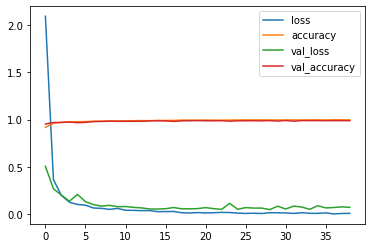

In [12]:
import pandas

pandas.DataFrame(history_A.history).plot()

<AxesSubplot:>

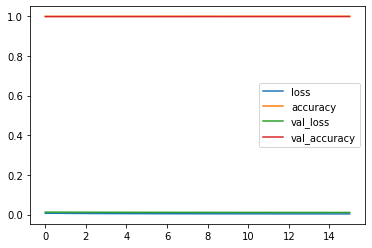

In [13]:
pandas.DataFrame(history_B.history).plot()

In [15]:
model_A.save("model_A.h5")
model_B.save("model_B.h5")

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(n_hiddens=4, n_neurons=100, learning_rate=1e-3, input_shape=[28, 28]):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    for layer in range(n_hiddens):
        model.add(layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal"))
    model.add(layers.Dense(5, activation="softmax"))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer, 
                  metrics=["accuracy"])
    return model

In [5]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(model=build_model)
keras_clf.fit(X_train_B, y_train_B, epochs=100, 
              validation_data=(X_val_B, y_val_B), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10, monitor="val_loss",
                                                       restore_best_weights=True)])

# score_B = keras_clf.score(X_test_B, y_test_B)

Epoch 1/100
469/469 [==============================] - 5s 6ms/step - loss: 2.8375 - accuracy: 0.8982 - val_loss: 0.5121 - val_accuracy: 0.9361
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2543 - accuracy: 0.9550 - val_loss: 0.3506 - val_accuracy: 0.9452
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1325 - accuracy: 0.9686 - val_loss: 0.2683 - val_accuracy: 0.9582
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0794 - accuracy: 0.9798 - val_loss: 0.2602 - val_accuracy: 0.9559
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.2523 - val_accuracy: 0.9597
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.2430 - val_accuracy: 0.9605
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 0.2412 - val_accuracy: 0.9625

KerasClassifier(
	model=<function build_model at 0x000002B82740FC10>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import GridSearchCV
import numpy as np

param_distrib = {
    "n_hiddens":[1, 2, 3, 4], 
    "n_neurons": np.arange(1, 100), 
    "learning_rate": reciprocal(3e-4, 3e-2),
}
gridsearch_cv = GridSearchCV(keras_clf, param_distrib, n_iter=10, cv=10)
gridsearch_cv.fit(X_train_B, y_train_B, epochs=100, 
                  validation_data=(X_val_B, y_val_B), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")])

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.average(cross_val_score(keras_clf, X_train_B, y_train_B, cv=3, scoring="accuracy"), axis=0)

157/157 [==============================] - 1s 3ms/step


0.9262666666666667

In [16]:
y_val_pred = keras_clf.predict(X_val_B)

250/250 [==============================] - 1s 3ms/step


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val_B, y_val_pred)

array([[1524,    0,   14,    3,   10],
       [   1, 1755,   14,   11,    7],
       [  18,   11, 1470,   45,   21],
       [  10,   14,   42, 1493,    4],
       [   5,    5,   26,    3, 1494]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_val_B, y_val_pred, average="weighted"), recall_score(y_val_B, y_val_pred, average="weighted")

(0.9669908378314356, 0.967)

<AxesSubplot:>

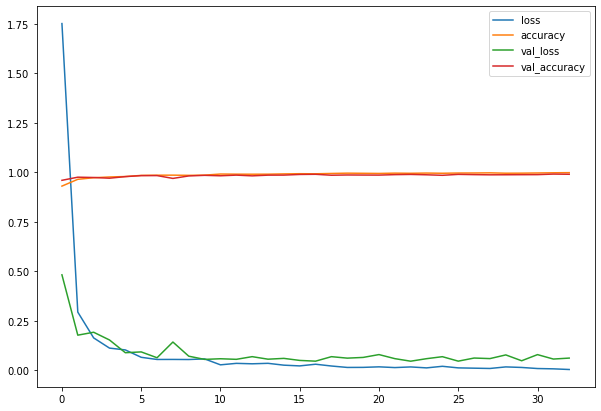

In [27]:
import pandas
pandas.DataFrame(history_A.history).plot(figsize=(10, 7))

In [32]:
from tensorflow.keras import layers, Sequential, callbacks
model_A_with_BN = Sequential([
    layers.Flatten(input_shape=[28, 28]), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    # layers.BatchNormalization(), 
    layers.Dense(5, activation="softmax")
])

model_A_with_BN.compile(loss="sparse_categorical_crossentropy", 
                        optimizer="adam", 
                        metrics=["accuracy"])

history_A_BN = model_A_with_BN.fit(X_train_A, y_train_A, epochs=100, 
                                   validation_data=(X_val_A, y_val_A), 
                                   callbacks=[callbacks.EarlyStopping(patience=10, 
                                                                      restore_best_weights=True, 
                                                                      monitor="val_loss")])

Epoch 1/100
719/719 [==============================] - 4s 4ms/step - loss: 0.1444 - accuracy: 0.9552 - val_loss: 0.1240 - val_accuracy: 0.9783
Epoch 2/100
719/719 [==============================] - 2s 3ms/step - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.1899 - val_accuracy: 0.9791
Epoch 3/100
719/719 [==============================] - 2s 3ms/step - loss: 0.0472 - accuracy: 0.9844 - val_loss: 0.1317 - val_accuracy: 0.9825
Epoch 4/100
719/719 [==============================] - 2s 3ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.2364 - val_accuracy: 0.9808
Epoch 5/100
719/719 [==============================] - 3s 4ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.2077 - val_accuracy: 0.9842
Epoch 6/100
719/719 [==============================] - 3s 4ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.2349 - val_accuracy: 0.9822
Epoch 7/100
719/719 [==============================] - 3s 4ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.2249 - val_accuracy: 0.9796

In [33]:
model_A_with_BN.evaluate(X_val_A, y_val_A)

238/238 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9783


[0.12395511567592621, 0.9782780408859253]

<AxesSubplot:>

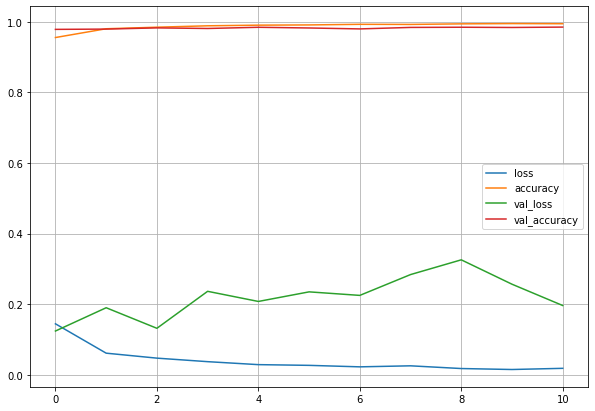

In [37]:
pandas.DataFrame(history_A_BN.history).plot(figsize=(10, 7), grid=True)

In [4]:
from tensorflow.keras import layers, Sequential, callbacks
model_A_with_BN_DP = Sequential([
    layers.Flatten(input_shape=[28, 28]), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"), 
    layers.Dropout(0.2),
    layers.Dense(5, activation="softmax")
])

model_A_with_BN_DP.compile(loss="sparse_categorical_crossentropy", 
                           optimizer="adam", 
                           metrics=["accuracy"])

history_A_BN_DP = model_A_with_BN_DP.fit(X_train_A, y_train_A, epochs=100, 
                       validation_data=(X_val_A, y_val_A), 
                       callbacks=[callbacks.EarlyStopping(patience=10, 
                                                          restore_best_weights=True, 
                                                          monitor="val_loss")])


Epoch 1/100
719/719 [==============================] - 8s 7ms/step - loss: 0.2764 - accuracy: 0.9130 - val_loss: 0.1127 - val_accuracy: 0.9722
Epoch 2/100
719/719 [==============================] - 3s 5ms/step - loss: 0.1370 - accuracy: 0.9578 - val_loss: 0.1193 - val_accuracy: 0.9774
Epoch 3/100
719/719 [==============================] - 3s 4ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.1050 - val_accuracy: 0.9812
Epoch 4/100
719/719 [==============================] - 3s 4ms/step - loss: 0.0902 - accuracy: 0.9735 - val_loss: 0.1046 - val_accuracy: 0.9817
Epoch 5/100
719/719 [==============================] - 2s 3ms/step - loss: 0.0817 - accuracy: 0.9759 - val_loss: 0.1324 - val_accuracy: 0.9831
Epoch 6/100
719/719 [==============================] - 2s 3ms/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.2502 - val_accuracy: 0.9841
Epoch 7/100
719/719 [==============================] - 5s 6ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.1440 - val_accuracy: 0.9829

In [5]:
pandas.DataFrame(history_A_BN_DP.history).plot(figsize=(10, 7), grid=True)

NameError: name 'pandas' is not defined

In [ ]:
model_A_with_BN_DP.save("model_A_BN_DP.h5")

### Q 9

In [8]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np

def dataset_split(data, labels, yes=True):
    n_data, n_labels = [], []
    for i, label in enumerate(labels):
        if yes:
            if label < 5:
                n_data.append(data[i])
                n_labels.append(labels[i])
        else:
            if label > 5:
                n_data.append(data[i])
                n_labels.append(labels[i]-5)
    return np.array(n_data), np.array(n_labels)


def reduce_dataset(data, labels):
    n_data, n_labels=[], []
    count = [0, 0, 0, 0, 0]
    for i, label in enumerate(labels):
        if (label == 5) & (count[0]< 99):
            n_data.append(data[i])
            n_labels.append(labels[i]-5)
            count[0] += 1
        elif (label == 6) & (count[1]< 99):
            n_data.append(data[i])
            n_labels.append(labels[i]-5)
            count[1] += 1
        elif (label == 7) & (count[2]< 99):
            n_data.append(data[i])
            n_labels.append(labels[i]-5)
            count[2] += 1
        elif (label == 8) & (count[3]< 99):
            n_data.append(data[i])
            n_labels.append(labels[i]-5)
            count[3] += 1
        elif (label == 9) & (count[4]< 99):
            n_data.append(data[i])
            n_labels.append(labels[i]-5)
            count[4] += 1        
    return np.array(n_data), np.array(n_labels)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_B, y_train_B = reduce_dataset(X_train, y_train)
X_train_B, X_val_B = X_train_A[:400], X_train_A[400:]
y_train_B, y_val_B = y_train_A[:400], y_train_A[400:]
X_test_B, y_test_B = dataset_split(X_test, y_test, yes=False)

pre_model = keras.models.load_model("model_A_BN_DP.h5")
model_tf = Sequential(pre_model.layers[:-1])
model_tf.add(layers.Dense(5, activation="softmax"))

for layer in model_tf.layers[:-1]:
    layer.trainable = False

model_tf.compile(loss="sparse_categorical_crossentropy", 
                 optimizer="adam", 
                 metrics=["accuracy"])

history_tf = model_tf.fit(X_train_B, y_train_B, epochs=4, 
                          validation_data=(X_val_B, y_val_B))


Epoch 1/4
13/13 [==============================] - 2s 138ms/step - loss: 2.9798 - accuracy: 0.1625 - val_loss: 1.9937 - val_accuracy: 0.2071
Epoch 2/4
13/13 [==============================] - 1s 124ms/step - loss: 1.9609 - accuracy: 0.3425 - val_loss: 1.1660 - val_accuracy: 0.5790
Epoch 3/4
13/13 [==============================] - 2s 143ms/step - loss: 1.2376 - accuracy: 0.5475 - val_loss: 0.6619 - val_accuracy: 0.7909
Epoch 4/4
13/13 [==============================] - 2s 145ms/step - loss: 0.8343 - accuracy: 0.6975 - val_loss: 0.3911 - val_accuracy: 0.9165


In [9]:
for layer in model_tf.layers[:-1]:
    layer.trainable=True

model_tf.compile(loss="sparse_categorical_crossentropy", 
                 optimizer=keras.optimizers.Adam(learning_rate=1e-4), 
                 metrics=["accuracy"])

history_tf = model_tf.fit(X_train_B, y_train_B, epochs=100, initial_epoch=4, 
                          validation_data=(X_val_B, y_val_B), 
                          callbacks=[keras.callbacks.EarlyStopping(patience=3, 
                                                                   restore_best_weights=True, 
                                                                   monitor="val_loss")])

Epoch 5/100
13/13 [==============================] - 4s 215ms/step - loss: 0.6008 - accuracy: 0.7700 - val_loss: 0.2651 - val_accuracy: 0.9608
Epoch 6/100
13/13 [==============================] - 2s 168ms/step - loss: 0.4847 - accuracy: 0.8275 - val_loss: 0.1955 - val_accuracy: 0.9742
Epoch 7/100
13/13 [==============================] - 1s 109ms/step - loss: 0.3850 - accuracy: 0.8700 - val_loss: 0.1587 - val_accuracy: 0.9778
Epoch 8/100
13/13 [==============================] - 2s 154ms/step - loss: 0.3036 - accuracy: 0.9025 - val_loss: 0.1398 - val_accuracy: 0.9792
Epoch 9/100
13/13 [==============================] - 2s 169ms/step - loss: 0.2836 - accuracy: 0.9200 - val_loss: 0.1291 - val_accuracy: 0.9797
Epoch 10/100
13/13 [==============================] - 2s 198ms/step - loss: 0.2212 - accuracy: 0.9375 - val_loss: 0.1231 - val_accuracy: 0.9804
Epoch 11/100
13/13 [==============================] - 1s 98ms/step - loss: 0.1713 - accuracy: 0.9575 - val_loss: 0.1212 - val_accuracy: 0.980

In [12]:
model_tf_2 = Sequential(pre_model.layers[:-1])
model_tf_2.add(layers.Dense(5, activation="softmax"))

for layer in model_tf_2.layers[:-4]:
    layer.trainable = False

model_tf_2.compile(loss="sparse_categorical_crossentropy", 
                   optimizer="adam", 
                   metrics=["accuracy"])

history_tf_2 = model_tf_2.fit(X_train_B, y_train_B, epochs=100, 
                              validation_data=(X_val_B, y_val_B), 
                              callbacks=[keras.callbacks.EarlyStopping(patience=10, 
                                                                       restore_best_weights=True, 
                                                                       monitor="val_loss")])

Epoch 1/100
13/13 [==============================] - 2s 97ms/step - loss: 1.6253 - accuracy: 0.4900 - val_loss: 0.3282 - val_accuracy: 0.9129
Epoch 2/100
13/13 [==============================] - 1s 60ms/step - loss: 0.3004 - accuracy: 0.9075 - val_loss: 0.1083 - val_accuracy: 0.9832
Epoch 3/100
13/13 [==============================] - 1s 52ms/step - loss: 0.1364 - accuracy: 0.9675 - val_loss: 0.0956 - val_accuracy: 0.9833
Epoch 4/100
13/13 [==============================] - 1s 54ms/step - loss: 0.0803 - accuracy: 0.9775 - val_loss: 0.0951 - val_accuracy: 0.9832
Epoch 5/100
13/13 [==============================] - 1s 64ms/step - loss: 0.1023 - accuracy: 0.9725 - val_loss: 0.0953 - val_accuracy: 0.9834
Epoch 6/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0658 - accuracy: 0.9825 - val_loss: 0.0958 - val_accuracy: 0.9838
Epoch 7/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.0962 - val_accuracy: 0.9840
Epoch 

In [14]:
for layer in model_A_with_BN_DP.layers[1:7]:
    layer.trainble=True

model_tf_2.compile(loss="sparse_categorical_crossentropy", 
                   optimizer="adam", 
                   metrics=["accuracy"])
model_tf_2.fit(X_train_B, y_train_B, epochs=100, initial_epoch=14,  
               validation_data=(X_val_B, y_val_B), 
               callbacks=[keras.callbacks.EarlyStopping(patience=10, 
                                                        restore_best_weights=True, 
                                                        monitor="val_loss")])

Epoch 15/100
13/13 [==============================] - 2s 76ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.1012 - val_accuracy: 0.9835
Epoch 16/100
13/13 [==============================] - 1s 61ms/step - loss: 0.0590 - accuracy: 0.9875 - val_loss: 0.1035 - val_accuracy: 0.9844
Epoch 17/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0459 - accuracy: 0.9875 - val_loss: 0.1063 - val_accuracy: 0.9847
Epoch 18/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.1076 - val_accuracy: 0.9847
Epoch 19/100
13/13 [==============================] - 1s 62ms/step - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.1119 - val_accuracy: 0.9843
Epoch 20/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0712 - accuracy: 0.9725 - val_loss: 0.1134 - val_accuracy: 0.9838
Epoch 21/100
13/13 [==============================] - 1s 59ms/step - loss: 0.0213 - accuracy: 0.9950 - val_loss: 0.1147 - val_accuracy: 0.9841

### Q 10

In [1]:
from tensorflow.keras import layers, callbacks, models
from tensorflow import keras

input_A = layers.Input(shape=[28, 28], name="input_A")
input_B = layers.Input(shape=[28, 28], name="input_B")
hidden_A_1 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_A_1")(input_A)
hidden_B_1 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_B_1")(input_B)
hidden_A_2 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_A_2")(hidden_A_1)
hidden_B_2 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_B_2")(hidden_B_1)
hidden_A_3 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_A_3")(hidden_A_2)
hidden_B_3 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_B_3")(hidden_B_2)
hidden_A_4 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_A_4")(hidden_A_3)
hidden_B_4 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_B_4")(hidden_B_3)
hidden_A_5 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_A_5")(hidden_A_4)
hidden_B_5 = layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_B_5")(hidden_B_4)
intersection = layers.Concatenate(name="Join_layer")([hidden_A_5, hidden_B_5])
hidden_dnn = layers.Dense(10, activation="elu", kernel_initializer="he_normal", name="hidden_layer")(intersection)
output = layers.Dense(1, activation="sigmoid")(hidden_dnn)
ax_model = models.Model(inputs=[input_A, input_B], outputs=output)

ax_model.compile(loss="binary_crossentropy", 
                 optimizer="adam", 
                 metrics=["accuracy"])

In [3]:
keras.utils.plot_model(ax_model, to_file="dot_img_file.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
